In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

This EDA is to identify variables that will later be used in correlational analyses to predict how well Portugese math students perform on their final exams. I start by reading the raw data into a frame and checking for null values and inspecting the type of each column.

In [11]:
rawData = pd.read_csv('C:\student-mat.csv')

In [12]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
rawData.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

Thankfully, we have no null values and the data is either in object or integer form. We need to identify the columns that correlate best with the target G3 variable as features for later regression. Converting potentially useful info then inspecting it is prudent at this point since we have an abundance of qualitative attributes.

In [14]:
qualitative_attrs = [a for a in rawData.columns if rawData.dtypes[a] == 'object']
quantitative_attrs = [a for a in rawData.columns if rawData.dtypes[a] != 'object']
rawData[qualitative_attrs]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


It appears that much of the data is binary in nature and can be easily transformed. Some good choices for potential features are the schools, sexes of the students, school support, family support, desire to continue onto higher education, internet access, and romantic involvement.


In [15]:
rawData['school'].replace({"GP":0,"MS":1}, inplace=True)
rawData['sex'].replace({"M":0,"F":1}, inplace=True)
rawData['schoolsup'].replace({"no":0,"yes":1}, inplace=True)
rawData['famsup'].replace({"no":0,"yes":1}, inplace=True)
rawData['higher'].replace({"no":0,"yes":1}, inplace=True)
rawData['internet'].replace({"no":0,"yes":1}, inplace=True)
rawData['romantic'].replace({"no":0,"yes":1}, inplace=True)
rawData[qualitative_attrs]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,1,U,GT3,A,at_home,teacher,course,mother,1,0,no,no,yes,1,0,0
1,0,1,U,GT3,T,at_home,other,course,father,0,1,no,no,no,1,1,0
2,0,1,U,LE3,T,at_home,other,other,mother,1,0,yes,no,yes,1,1,0
3,0,1,U,GT3,T,health,services,home,mother,0,1,yes,yes,yes,1,1,1
4,0,1,U,GT3,T,other,other,home,father,0,1,yes,no,yes,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0,U,LE3,A,services,services,course,other,0,1,yes,no,yes,1,0,0
391,1,0,U,LE3,T,services,services,course,mother,0,0,no,no,no,1,1,0
392,1,0,R,GT3,T,other,other,course,other,0,0,no,no,no,1,0,0
393,1,0,R,LE3,T,services,other,course,mother,0,0,no,no,no,1,1,0


In [16]:
columnsToDrop = [l for l in qualitative_attrs if rawData.dtypes[l] == 'object']
newQual_attrs = [q for q in qualitative_attrs if rawData.dtypes[q] != 'object']
rawData = rawData.drop(columnsToDrop,axis=1)

Now to check if there is any obvious correlation with the newly transformed qualitative variables and the final test scores.

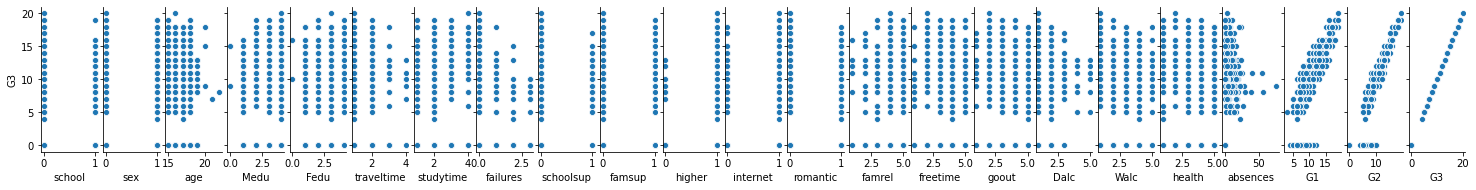

In [17]:
graph = sns.pairplot(rawData, y_vars = "G3", x_vars = rawData.columns.values)
graph.fig.set_figwidth(20)

Since most of the above appear to be uncorrelated with the target variable they can be safely dropped. Adding them to future models would likely only create noise or add redundancy.

In [18]:
rawData = rawData.drop(newQual_attrs, axis = 1)
rawData.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

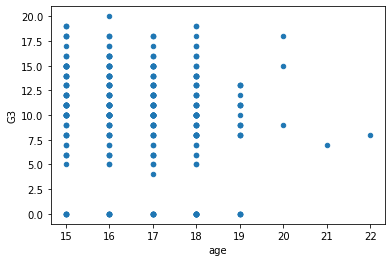

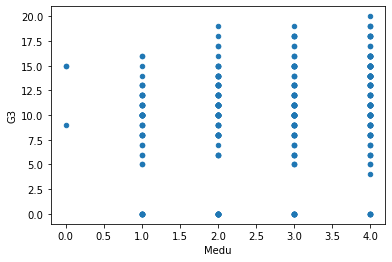

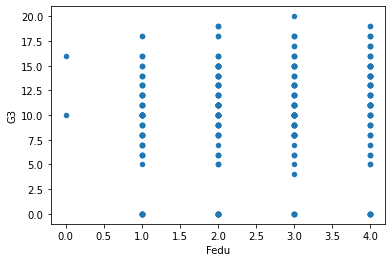

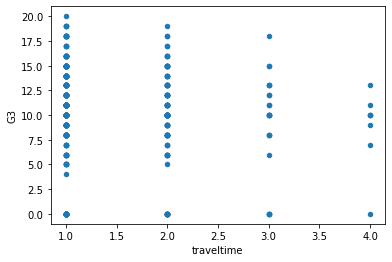

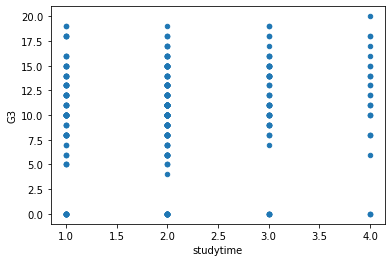

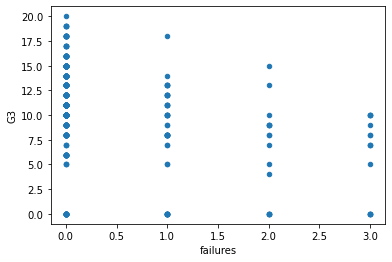

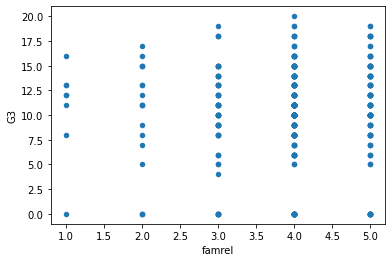

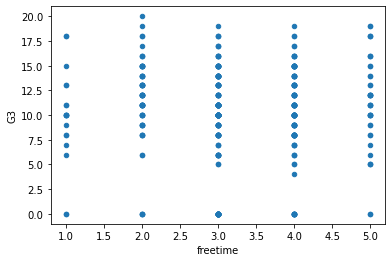

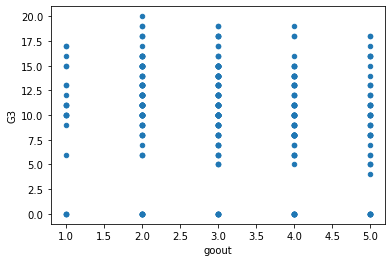

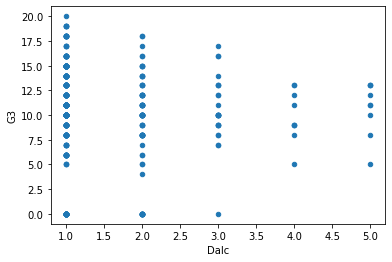

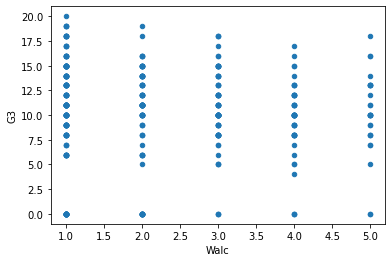

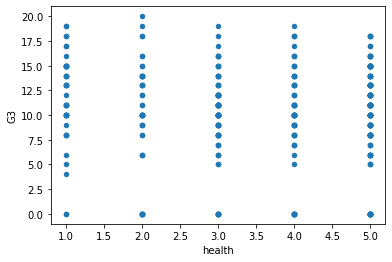

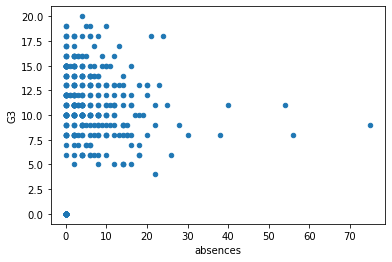

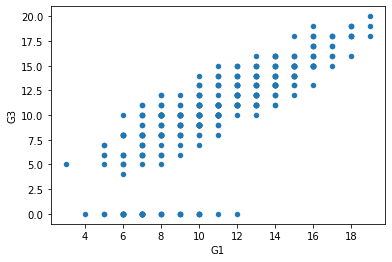

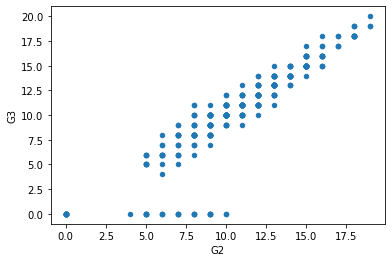

In [19]:
for i in rawData.columns.drop('G3'):
    rawData.plot(kind = 'scatter', x = i, y = 'G3')

Now it's time to create a list of features for naive bayes to establish a baseline which we can compare to future analyses. Good candidates are the students scores on the first and second tests, G1 and G2 respectively, as well as study time, previous failures, daily alcohol consumption (Dalc), and absences. Note that this lines up pretty well with our expectations of relevant factors for academic performance.

In [20]:
rawData = rawData.drop(['age','Medu','Fedu','traveltime','famrel','freetime','goout','Walc','health'], axis = 1)

In [21]:
features = rawData.columns.drop('G3')

Comparing student's first and second test scores to the final should give us a clear primary factor. To choose between them it's simple enough to estimate graphically in this case as seen below:

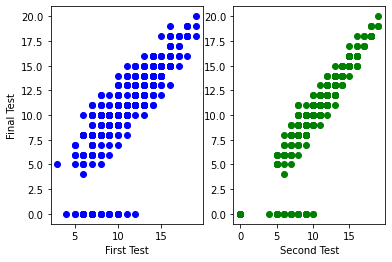

In [22]:
plt.subplot(1,2,1)
plt.plot(rawData.G1,rawData.G3,'bo')
plt.xlabel('First Test')
plt.ylabel('Final Test')

plt.subplot(1,2,2)
plt.plot(rawData.G2,rawData.G3,'go')
plt.xlabel('Second Test')
plt.show()

The second test is more closely correlated with performance on the final but for the sake of illustration let's compare both using naive bayes.

In [23]:
singleVarDF = pd.DataFrame(rawData, columns = ['G1'])
y = rawData.G3
x_train, x_test, y_train, y_test = train_test_split(singleVarDF, y, test_size = 0.3, random_state = 1)

In [24]:
model = GaussianNB()
model.fit(x_train, y_train).predict(x_test)
model.score(x_test,y_test)

0.19327731092436976

In [25]:
singleVarDF = pd.DataFrame(rawData, columns = ['G2'])
x_train, x_test, y_train, y_test = train_test_split(singleVarDF, y, test_size = 0.3, random_state = 1)
model.fit(x_train, y_train).predict(x_test)
model.score(x_test,y_test)

0.4369747899159664

Obviously the first test is a poor predictor using Bayes, but the second test was decent. Overall the lack of clustering and clear linear relationship between the variables used here suggests that linear regression is the next step. This will be continued in a future project dedicated solely to single and multiple regression analysis of this dataset, saved below

In [225]:
rawData.to_csv('PortugalMathLinearRegression', index = False)

Credit for this dataset goes to UCI Machine Learning.

The data used in this project was sourced from: https://www.kaggle.com/uciml/student-alcohol-consumption